Todos os códigos em Python foram retirados dos links abaixo:

Créditos da aula do youtube: https://www.youtube.com/watch?v=S3V5qJ1bxhk

Github do Professor Francisco Rodrigues: https://github.com/franciscoicmc/simulacao/blob/master/Teste-de-hipoteses.ipynb

# Teste de Hipótese

Hipótese nula: o acusado é inocente
Hipótese alternativa: o acusado é culpado
    
    Hipótese nula: H0
    Hipótese alternativa: H1

 Definição: Uma hipótese é uma declaração sobre um parâmetro da população

# Exemplo: Suponha que temos uma moeda e queremos verificar se a moeda é justa ou não.

Neste caso, nossas hipóteses são:
        - H0: a moeda é justa, isto é, 0 = 1/2
        - H1: a moeda não é justa, isto é, 0 ≠ 1/2

Vamos supor que lançamos a moeda 100 vezes. Seja p a fração de caras observadas.

Então, podemos definir:

    - Se |p - 0,50| <= Pc: aceitamos H0
    - Se |p - 0,50| > Pc: rejeitamos H0

Para encontrarmos Pc podemos cometer dois tipos de erro:

- Erro do tipo 1: Rejeitar H0, quando H0 for verdadeira.
- Erro do tipo 2: Aceitar H0 quando H0 for falsa.

A cada um desses erros, associamos uma probabilidade de cometê-los.

    α = P(Rejeitar H0|H0 é verdadeira)
    β = P(Aceitar H0|H0 é falsa)


Tipos de Testes

- H0: 0 = 00: Hipóteses Simples
- H0: 0 > 00 ou H0: 0 < 00: Hipóteses Compostas

Teste de hipóteses para a média

H0: μ = c
    H1: μ < c
    H1: μ > c
    H1: μ ≠ c

EXEMPLO: Uma fábrica anuncia que o índice de nicotina dos cigarros de uma marca é igual a 20mg por cigarro. Um laboratório realiza 20 análises do índice obtendo: 22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21, 18, 25, 16, 20, 21. Sabe-se que o índice de nicotina dos cigarros dessa marca se distribui normalmente com variância 4mg2. Pode-se aceitar a afirmação do fabricante, ao nível de 5%?

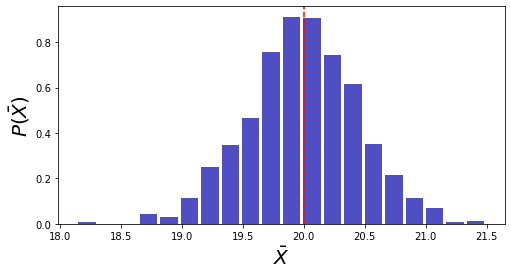

In [7]:
import numpy as np
import matplotlib.pyplot as plt

mu = 20
sigma = 2
n = 20
Ns = 1000
Xm = [] # Distribuição da media amostral
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # Sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label=str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)

In [8]:
X = [22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21, 18, 25, 16, 20, 21]
xobs = np.mean(X)

alpha = 95
xc = np.percentile(Xm, alpha)
print('Xc=',xc,' Xobs = ', xobs)
if(xobs < xc):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Xc= 20.713637163770954  Xobs =  20.45
Aceitamos H0


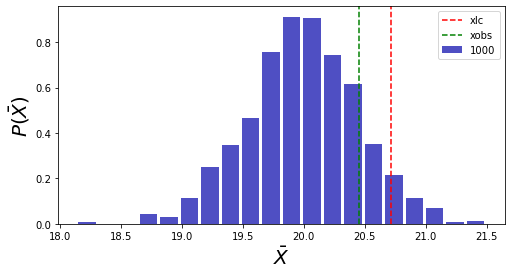

In [10]:
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label=str(Ns), density=True)
plt.axvline(x=xc, color='red', linestyle='--', label = 'xlc')
plt.axvline(x=xobs, color='green', linestyle='--', label='xobs')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.legend()
plt.show(True)

# Exemplo 2

Um pesquisador deseja estudar o efeito de certa substância no tempo de reação de seres vivos a um certo tipo de estímulo. Um experimento é desenvolvido com cobaias, que são inoculadas com a substância e submetidas a um estímulo elétrico, com seus tempos de reação (em segundos) anotados. Os seguintes valores foram obtidos: T = [9,1;9,3;7,2;13,3;10,9;7,2;9,9;8,0;8,6;7,5]
Admite-se que, em geral, o tempo de reação tem distribuição Normal com média 8 segundos e desvio padrão 2 segundos. Entretanto, o pesquisador desconfia que o tempo médio sofre alteração por influência da substância. Verifique a nível 6% se o tempo de reação das cobaias submetidas à substância foi alterado.

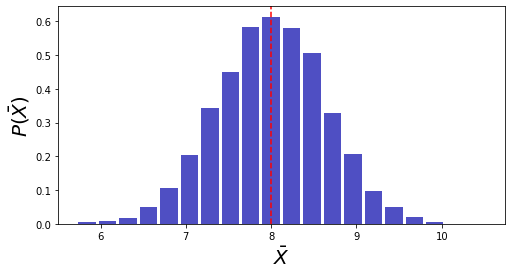

In [11]:
import numpy as np
import matplotlib.pyplot as plt

mu = 8
sigma = 2
n = 10
Ns = 10000
Xm=[] #distribuicao da media amostral
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)

In [12]:
X = [9.1,9.3,7.2,13.3,10.9,7.2,9.9,8.0,8.6,7.5]
xobs = np.mean(X)

alpha = 3
xc1 = np.percentile(Xm, alpha)
xc2 = np.percentile(Xm, 100-alpha)
print('Xc1=',xc1, '  Xc2=', xc2, '  Xobs = ', xobs)
if(xobs < xc1 or xobs > xc2):
    print("Rejeitamos H0")
else:
    print("Aceitamos H0")

Xc1= 6.813329047344426   Xc2= 9.169030516735564   Xobs =  9.1
Aceitamos H0


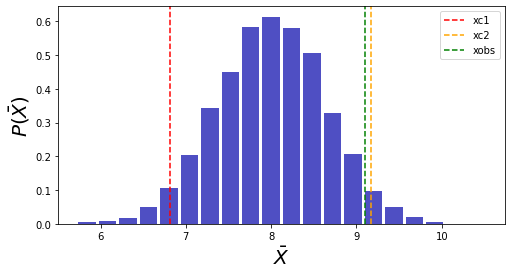

In [13]:
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
plt.axvline(x=xc1, color='red', linestyle='--', label = 'xc1')
plt.axvline(x=xc2, color='orange', linestyle='--', label = 'xc2')
plt.axvline(x=xobs, color='green', linestyle='--', label = 'xobs')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.legend()
plt.show(True)

# Valor p

Vamos considerar um exemplo. Sejam as hipóteses:
H0: u = 10
H1: u < 10

Assumimos que a população tem distribuição uniforme com desvio padrão , definido abaixo.

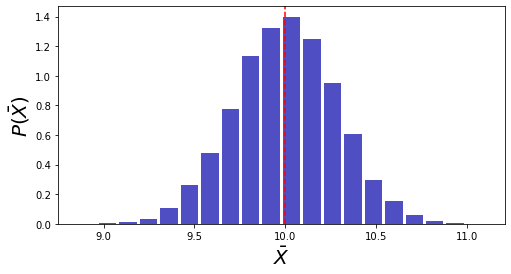

In [14]:
import numpy as np
import matplotlib.pyplot as plt

mu = 10
sigma = 2
n = 50
Ns = 10000
Xm=[] #distribuicao da media amostral
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)

Vamos supor que o valor observado Xobs 
 é definido abaixo. De acordo com o nível de significância, podemos aceitar ou rejeitar , conforme vemos abaixo.

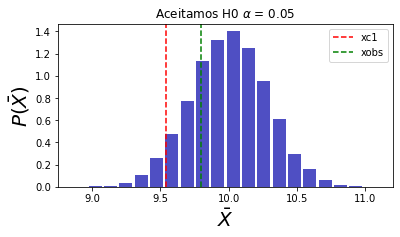

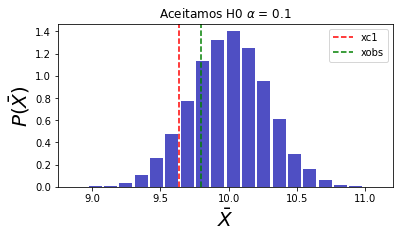

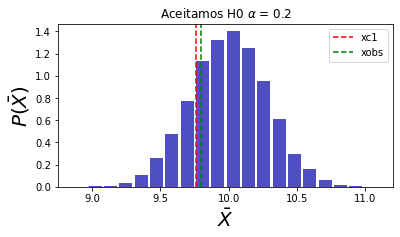

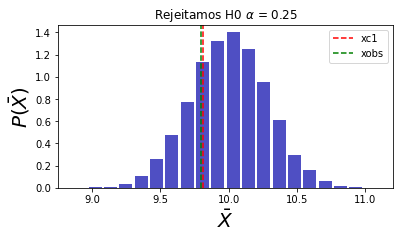

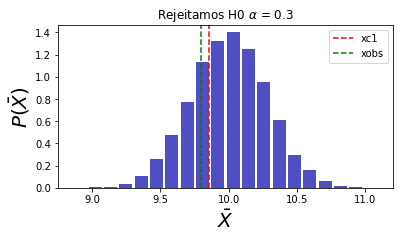

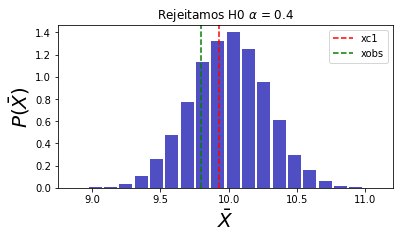

In [15]:
xobs = 9.8
alphas = [5,10,20,25, 30,40]
for alpha in alphas:
    xc = np.percentile(Xm, alpha)
    plt.figure(figsize=(6,3))
    a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
    plt.axvline(x=xc, color='red', linestyle='--', label = 'xc1')
    plt.axvline(x=xobs, color='green', linestyle='--', label = 'xobs')
    plt.xlabel(r'$\bar{X}$', fontsize=20)
    plt.ylabel(r'$P(\bar{X})$', fontsize=20)
    plt.legend()
    if(xobs < xc):
        plt.title("Rejeitamos H0"+r' $\alpha$ = ' + str(alpha/100))
    else:
        plt.title("Aceitamos H0"+r' $\alpha$ = ' + str(alpha/100))
    plt.show(True)

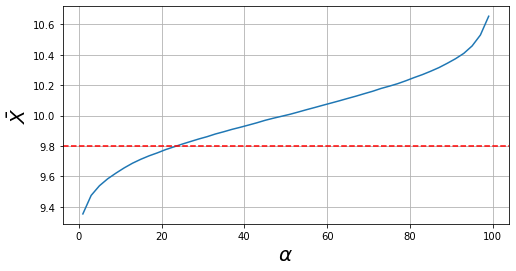

In [16]:
xobs = 9.8
xcs = []
alphas = []
for alpha in np.arange(1,100,2):
    xc = np.percentile(Xm, alpha)
    xcs.append(xc)
    alphas.append(alpha)
    
plt.figure(figsize=(8,4))
plt.plot(alphas,xcs)
plt.axhline(y=xobs, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\bar{X}$', fontsize=20)

plt.grid(True)
plt.show(True)

Podemos calcular o valor p: P(X > Xobs|u = u0) = alpha

In [17]:
pvalue = 0
for i in range(0, len(Xm)):
    if(Xm[i] < xobs):
        pvalue = pvalue + 1
pvalue = pvalue/len(Xm)
print('P-valor: ', pvalue)

P-valor:  0.23632363236323634


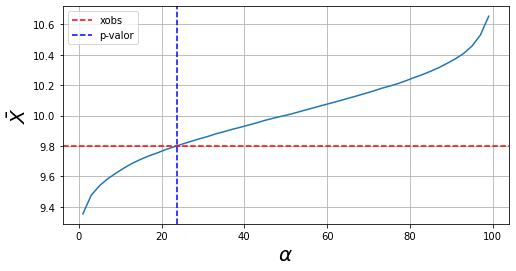

In [18]:
xobs = 9.8
xcs = []
alphas = []
for alpha in np.arange(1,100,2):
    xc = np.percentile(Xm, alpha)
    xcs.append(xc)
    alphas.append(alpha)
    
plt.figure(figsize=(8,4))
plt.plot(alphas,xcs)
plt.axhline(y=xobs, color='red', linestyle='--', label = 'xobs')
plt.axvline(x=pvalue*100, color='blue', linestyle='--', label = 'p-valor')
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\bar{X}$', fontsize=20)
plt.legend()
plt.grid(True)
plt.show(True)